In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import math

In [2]:
os.getcwd()

'C:\\Users\\32mor\\data_science\\France politics'

In [11]:
df_eda = pd.read_csv('Leg_2017_Resultats_BVT_T1.csv',encoding='latin1',sep=';',error_bad_lines=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,6,142,143,144,145,147,148,150,151,152,153,155,156,158,159,160,161,163,164,166,167,168,169,171,172,174,175,176,177,179,180,182,183,184,185,187,188,190,191,192,193,195,196,198,199,200,201,203,204,206,207,208,209,211,212,214,215,216,217,219,220,222,223,224,225,227,228,230,231,232,233,235,236,284) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df_eda.iloc[:2,:21]

,Code du departement,Libelle du departement,Code de la circonscription,Libelle de la circonscription,Code de la commune,Libelle de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimes,% Exp/Ins,% Exp/Vot
0,1,Ain,4,4eme circonscription,1,L'Abergement-Clemenciat,1,598,261,"43,65",...,"56,35",0,"0,00","0,00",0,"0,00","0,00",337,"56,35","100,00"
1,1,Ain,5,5eme circonscription,2,L'Abergement-de-Varey,1,211,79,"37,44",...,"62,56",3,"1,42","2,27",1,"0,47","0,76",128,"60,66","96,97"


In [13]:
df_eda.iloc[:2,21:29]

,N Panneau,Sexe,Nom,Prenom,Nuance,Voix,% Voix/Ins,% Voix/Exp
0,13,F,DRACOS,Electre,EXG,0,"0,00","0,00"
1,1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"


In [14]:
(df_eda.shape[1]-21)/8

33.0

In [15]:
colonnes_socle = list(df_eda.columns)[:21]

In [16]:
colonnes_bis=list(df_eda.columns)[21:29]

In [17]:
df_eda.iloc[:2,21:40]

,N Panneau,Sexe,Nom,Prenom,Nuance,Voix,% Voix/Ins,% Voix/Exp,N Panneau2,Sexe3,Nom4,Prenom5,Nuance6,Voix7,% Voix/Ins8,% Voix/Exp9,N Panneau10,Sexe11,Nom12
0,13,F,DRACOS,Electre,EXG,0,"0,00","0,00",12,F,LATTARD,Catherine,COM,3,"0,50","0,89",9,F,HUGUET
1,1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00",6,M,LARGERON,Guy,EXG,2,"0,95","1,56",10,F,FERRI


In [19]:
df_base = pd.DataFrame(columns=colonnes_socle+colonnes_bis)

In [20]:
print(df_base.shape)
for i in range(int((df_eda.shape[1]-21)/8)):
    colonnes = colonnes_socle+list(df_eda.iloc[:2,21+8*i:21+8*i+8].columns)
    #print(df_mid.shape)
    df_mid = df_eda[colonnes]
    df_mid.columns=colonnes_socle+colonnes_bis
    df_base = pd.concat([df_base,df_mid],axis=0)
    print(df_base.shape)

(0, 29)
(69242, 29)
(138484, 29)
(207726, 29)
(276968, 29)
(346210, 29)
(415452, 29)
(484694, 29)
(553936, 29)
(623178, 29)
(692420, 29)
(761662, 29)
(830904, 29)
(900146, 29)
(969388, 29)
(1038630, 29)
(1107872, 29)
(1177114, 29)
(1246356, 29)
(1315598, 29)
(1384840, 29)
(1454082, 29)
(1523324, 29)
(1592566, 29)
(1661808, 29)
(1731050, 29)
(1800292, 29)
(1869534, 29)
(1938776, 29)
(2008018, 29)
(2077260, 29)
(2146502, 29)
(2215744, 29)
(2284986, 29)


In [21]:
df_base.dropna(inplace=True)

In [22]:
df_base

,Code du departement,Libelle du departement,Code de la circonscription,Libelle de la circonscription,Code de la commune,Libelle de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,% Exp/Ins,% Exp/Vot,N Panneau,Sexe,Nom,Prenom,Nuance,Voix,% Voix/Ins,% Voix/Exp
0,1,Ain,4,4eme circonscription,1,L'Abergement-Clemenciat,1,598,261,"43,65",...,"56,35","100,00",13,F,DRACOS,Electre,EXG,0,"0,00","0,00"
1,1,Ain,5,5eme circonscription,2,L'Abergement-de-Varey,1,211,79,"37,44",...,"60,66","96,97",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
2,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,1,1126,637,"56,57",...,"42,27","97,34",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
3,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,2,1134,579,"51,06",...,"47,71","97,48",1,M,BOULMe,Jean-Michel,EXG,1,"0,09","0,18"
4,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,3,1117,560,"50,13",...,"49,06","98,38",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69181,ZZ,Franais etablis hors de France,9,9eme circonscription,169,Praia,1,289,273,"94,46",...,"5,54","100,00",12,M,DURAND,Loc,EXD,0,"0,00","0,00"
69185,ZZ,Franais etablis hors de France,9,9eme circonscription,173,Rabat,1,7496,5679,"75,76",...,"23,91","98,62",12,M,DURAND,Loc,EXD,3,"0,04","0,17"
69216,ZZ,Franais etablis hors de France,9,9eme circonscription,205,Tanger,1,1803,1422,"78,87",...,"20,41","96,59",12,M,DURAND,Loc,EXD,1,"0,06","0,27"
69225,ZZ,Franais etablis hors de France,9,9eme circonscription,214,Tripoli,1,106,92,"86,79",...,"13,21","100,00",12,M,DURAND,Loc,EXD,1,"0,94","7,14"


In [24]:
df_base[df_base['Code du departement']==75]['Nuance'].unique()

array(['EXG', 'COM', 'FI', 'SOC', 'ECO', 'DVG', 'RDG', 'DIV', 'REM',
       'REG', 'LR', 'UDI', 'DVD', 'MDM', 'DLF', 'FN', 'EXD'], dtype=object)

In [25]:
df_base

,Code du departement,Libelle du departement,Code de la circonscription,Libelle de la circonscription,Code de la commune,Libelle de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,% Exp/Ins,% Exp/Vot,N Panneau,Sexe,Nom,Prenom,Nuance,Voix,% Voix/Ins,% Voix/Exp
0,1,Ain,4,4eme circonscription,1,L'Abergement-Clemenciat,1,598,261,"43,65",...,"56,35","100,00",13,F,DRACOS,Electre,EXG,0,"0,00","0,00"
1,1,Ain,5,5eme circonscription,2,L'Abergement-de-Varey,1,211,79,"37,44",...,"60,66","96,97",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
2,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,1,1126,637,"56,57",...,"42,27","97,34",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
3,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,2,1134,579,"51,06",...,"47,71","97,48",1,M,BOULMe,Jean-Michel,EXG,1,"0,09","0,18"
4,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,3,1117,560,"50,13",...,"49,06","98,38",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69181,ZZ,Franais etablis hors de France,9,9eme circonscription,169,Praia,1,289,273,"94,46",...,"5,54","100,00",12,M,DURAND,Loc,EXD,0,"0,00","0,00"
69185,ZZ,Franais etablis hors de France,9,9eme circonscription,173,Rabat,1,7496,5679,"75,76",...,"23,91","98,62",12,M,DURAND,Loc,EXD,3,"0,04","0,17"
69216,ZZ,Franais etablis hors de France,9,9eme circonscription,205,Tanger,1,1803,1422,"78,87",...,"20,41","96,59",12,M,DURAND,Loc,EXD,1,"0,06","0,27"
69225,ZZ,Franais etablis hors de France,9,9eme circonscription,214,Tripoli,1,106,92,"86,79",...,"13,21","100,00",12,M,DURAND,Loc,EXD,1,"0,94","7,14"


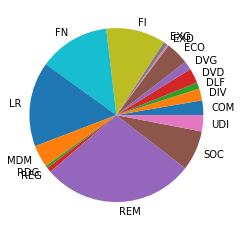

In [30]:
plt.pie(df_base.groupby(['Nuance'])['Voix'].sum().values,labels=list(df_base.groupby(['Nuance'])['Voix'].sum().index))
plt.show()

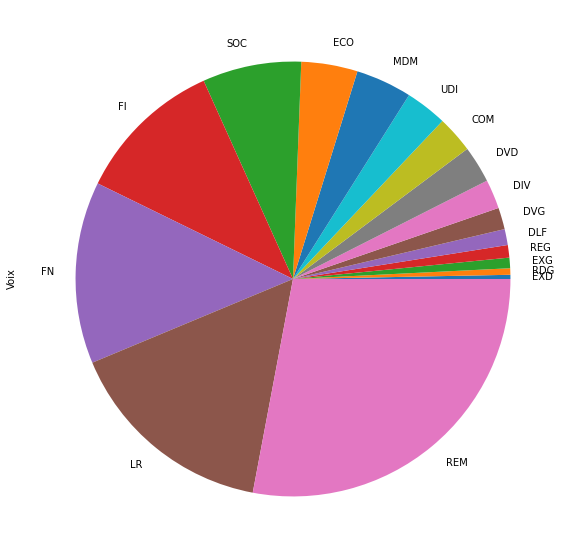

In [39]:

with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
    fig,ax=plt.subplots(figsize=(14,10))
    df_base[df_base['Code du departement']!=75].groupby(['Nuance'])['Voix'].sum().sort_values().plot.pie(ax=ax)

In [42]:
df_base.sort_values(['Code du departement','Libelle de la commune','Voix'])

,Code du departement,Libelle du departement,Code de la circonscription,Libelle de la circonscription,Code de la commune,Libelle de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,% Exp/Ins,% Exp/Vot,N Panneau,Sexe,Nom,Prenom,Nuance,Voix,% Voix/Ins,% Voix/Exp
2,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,1,1126,637,"56,57",...,"42,27","97,34",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
4,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,3,1117,560,"50,13",...,"49,06","98,38",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
5,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,4,1011,519,"51,34",...,"47,97","98,58",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
8,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,7,1056,560,"53,03",...,"46,40","98,79",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
9,1,Ain,5,5eme circonscription,4,Amberieu-en-Bugey,8,1034,532,"51,45",...,"47,29","97,41",1,M,BOULMe,Jean-Michel,EXG,0,"0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69239,ZZ,Franais etablis hors de France,6,6eme circonscription,229,Zurich,1,21502,16821,"78,23",...,"21,64","99,42",5,M,MARCHAND,Jean-Claude,FN,96,"0,45","2,06"
69239,ZZ,Franais etablis hors de France,6,6eme circonscription,229,Zurich,1,21502,16821,"78,23",...,"21,64","99,42",9,F,BOUDET,Emmanuelle,FI,175,"0,81","3,76"
69239,ZZ,Franais etablis hors de France,6,6eme circonscription,229,Zurich,1,21502,16821,"78,23",...,"21,64","99,42",12,M,ROSSIAUD,Jean,ECO,345,"1,60","7,41"
69239,ZZ,Franais etablis hors de France,6,6eme circonscription,229,Zurich,1,21502,16821,"78,23",...,"21,64","99,42",6,F,SCHMID,Claudine,LR,756,"3,52","16,24"


In [50]:
df_max = df_base.groupby(['Libelle du departement','Libelle de la commune','Code de la commune','Nuance'])['Voix'].sum().reset_index().sort_values(['Libelle du departement','Libelle de la commune','Code de la commune','Voix'],ascending=[1,1,1,0])

In [51]:
url_geoloc = """https://www.data.gouv.fr/fr/datasets/r/dbe8a621-a9c4-4bc3-9cae-be1699c5ff25"""

In [54]:
df_geoloc = pd.read_csv(url_geoloc,sep=',')

In [61]:
df_max.drop_duplicates(['Libelle de la commune'])

,Libelle du departement,Libelle de la commune,Code de la commune,Nuance,Voix
8,Ain,Amberieu-en-Bugey,4,REM,1123.0
19,Ain,Amberieux-en-Dombes,5,REM,183.0
26,Ain,Ambleon,6,FI,13.0
38,Ain,Ambronay,7,LR,278.0
48,Ain,Ambutrix,8,LR,107.0
...,...,...,...,...,...
375535,Yvelines,Villepreux,674,REM,1819.0
375559,Yvelines,Villiers-Saint-Frederic,683,REM,506.0
375570,Yvelines,Villiers-le-Mahieu,681,LR,126.0
375583,Yvelines,Viroflay,686,REM,3342.0


In [62]:
df_geoloc['Libelle de la commune'] =df_geoloc['nom_commune_complet'].str.replace('é','e').replace('è','e')

In [64]:
df_geoloc[['Libelle de la commune','latitude','longitude']]

,Libelle de la commune,latitude,longitude
0,L'Abergement-Clemenciat,46.153426,4.926114
1,L'Abergement-de-Varey,46.009188,5.428017
2,Amberieu-en-Bugey,45.960848,5.372926
3,Amberieux-en-Dombes,45.996180,4.912273
4,Ambleon,45.749499,5.594320
...,...,...,...
39196,Voh,NaN,NaN
39197,Yate,NaN,NaN
39198,Kouaoua,NaN,NaN
39199,Ile de clipperton,NaN,NaN


In [66]:
df_geoloc[df_geoloc['code_postal']==75001]

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region,Libelle de la commune
32613,75101,PARIS 01,75001,PARIS,NaN,48.86263,2.336293,101.0,NaN,Paris 01,Paris 01,75,Paris,11.0,Île-de-France,Paris 01


In [ ]:
[commune for commune in df_geoloc['Libelle de la commune'].unique() if '']